In [18]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

## 로이터 뉴스 카테고리 분류

In [20]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [21]:
category = np.max(Y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [22]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [24]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [25]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
history1 = model.fit(x_train, y_train, batch_size = 100, epochs=30, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8982/8982 [==============================] - 14s 2ms/step - loss: 2.6157 - acc: 0.3376 - val_loss: 2.3280 - val_acc: 0.3620
Epoch 2/30
8982/8982 [==============================] - 13s 1ms/step - loss: 2.0066 - acc: 0.4882 - val_loss: 1.8701 - val_acc: 0.5365
Epoch 3/30
8982/8982 [==============================] - 13s 1ms/step - loss: 1.8225 - acc: 0.5343 - val_loss: 1.7584 - val_acc: 0.5508
Epoch 4/30
8982/8982 [==============================] - 13s 1ms/step - loss: 1.6907 - acc: 0.5617 - val_loss: 1.7068 - val_acc: 0.5623
Epoch 5/30
8982/8982 [==============================] - 14s 2ms/step - loss: 1.6571 - acc: 0.5659 - val_loss: 1.7143 - val_acc: 0.5619
Epoch 6/30
8982/8982 [==============================] - 14s 2ms/step - loss: 1.5876 - acc: 0.5885 - val_loss: 1.6476 - val_acc: 0.5757
Epoch 7/30
8982/8982 [==============================] - 14s 2ms/step - loss: 1.5451 - acc: 0.6011 - val_loss: 1.5924 - val_acc: 0.6015
Epoch 8

In [27]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 477us/step

 Test Accuracy: 0.7061


In [28]:
y_vloss = history1.history['val_loss']
y_loss = history1.history['loss']

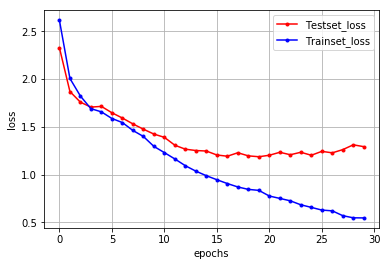

In [29]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [30]:
del model

## IMDB 리뷰 분석

In [31]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [33]:
(x_train, y_train), (x_test, y_test) =imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 5s 0us/step


In [34]:
X_train = sequence.pad_sequences(x_train, maxlen=100)
X_test = sequence.pad_sequences(x_test, maxlen=100)

In [35]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

W0822 10:23:07.763332  3320 deprecation.py:506] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0822 10:23:07.816335  3320 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history2 = model.fit(X_train, y_train, epochs = 15, batch_size = 100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 21s 831us/step - loss: 0.2376 - acc: 0.9056 - val_loss: 0.3454 - val_acc: 0.8472
Epoch 2/15
25000/25000 [==============================] - 20s 818us/step - loss: 0.2019 - acc: 0.9213 - val_loss: 0.3408 - val_acc: 0.8555
Epoch 3/15
25000/25000 [==============================] - 21s 828us/step - loss: 0.1683 - acc: 0.9366 - val_loss: 0.3743 - val_acc: 0.8514
Epoch 4/15
25000/25000 [==============================] - 21s 837us/step - loss: 0.1399 - acc: 0.9465 - val_loss: 0.4340 - val_acc: 0.8476
Epoch 5/15
25000/25000 [==============================] - 21s 822us/step - loss: 0.1147 - acc: 0.9582 - val_loss: 0.4540 - val_acc: 0.8478
Epoch 6/15
25000/25000 [==============================] - 21s 824us/step - loss: 0.0955 - acc: 0.9662 - val_loss: 0.4745 - val_acc: 0.8478
Epoch 7/15
25000/25000 [==============================] - 21s 825us/step - loss: 0.0784 - acc: 0.9726 - val_loss: 0.

In [41]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

25000/25000 [==============================] - 4s 156us/step

 Test Accuracy: 0.8419


In [42]:
y_vloss = history2.history['val_loss']
y_loss = history2.history['loss']

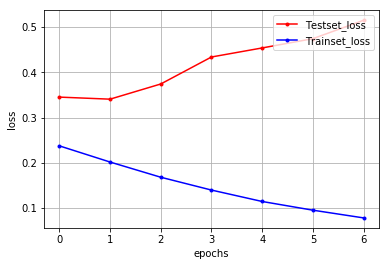

In [43]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()